Carga de librerias

In [1]:
#Carga de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Leer el archivo



In [2]:
VentasFinal = pd.read_csv("/Users/Macbook/Downloads/InventoryDataset/SalesFINAL12312016.csv",sep=',')


Para darnos una idea general de los datos, se imprimen las primeros 5 lineas.


In [3]:
VentasFinal.head()


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


Análisis exploratorio de datos


In [4]:
# Se creó una función donde devuelve una tabla con la info necesaria para obtener información de los datos.
def dataframe_info(df):
    report = pd.DataFrame(columns=['Columna', 'TipoDato', 'Filas', 'Valores Unicos', 'Missings', 'Missings (%)'])
    for column in df.columns:
        data_type = df[column].dtype
        rows = df[column].shape[0] 
        unique_count = df[column].nunique()
        missing_values = df[column].isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        report.loc[len(report)] = [column, data_type, rows, unique_count,  missing_values, missing_percentage.round(4)]
    return report

In [5]:
dataframe_info(VentasFinal)


,Columna,TipoDato,Filas,Valores Unicos,Missings,Missings (%)
0,InventoryId,object,1048575,170131,0,0.0
1,Store,int64,1048575,79,0,0.0
2,Brand,int64,1048575,7658,0,0.0
3,Description,object,1048575,6890,0,0.0
4,Size,object,1048575,40,0,0.0
5,SalesQuantity,int64,1048575,141,0,0.0
6,SalesDollars,float64,1048575,3426,0,0.0
7,SalesPrice,float64,1048575,273,0,0.0
8,SalesDate,object,1048575,60,0,0.0
9,Volume,int64,1048575,22,0,0.0


La exploración de datos ayuda a identificar irregularidades que necesitan limpieza y preprocesamiento:

El formato de fecha difiere entre tablas. Por ejemplo, la tabla de VentasFinal utiliza mm/dd/aaaa, mientras que las otras utilizan aaaa/mm/dd.
Las columnas Tamaño(Size) y Volumen llevan datos duplicados y una de ellas puede eliminar.

Comprobamos si hay duplicados.



In [6]:
duplicados = VentasFinal.duplicated().any()
if duplicados:
    print(f"El dataset tiene duplicados.")
else:
    print(f"El dataset no tiene duplicados.")

El dataset no tiene duplicados.


Realizamos un analisis decriptivo de cada columna.



In [7]:
#iteramos sobre cada columna de nuestro dataframe con un cilo for
for i in VentasFinal.columns:
    print(i)
    print(VentasFinal[i].describe()) 
    print('------------------------')

InventoryId
count                1048575
unique                170131
top       13_TARMSWORTH_8064
freq                      57
Name: InventoryId, dtype: object
------------------------
Store
count    1.048575e+06
mean     4.008063e+01
std      2.435739e+01
min      1.000000e+00
25%      1.500000e+01
50%      3.900000e+01
75%      6.400000e+01
max      7.900000e+01
Name: Store, dtype: float64
------------------------
Brand
count    1.048575e+06
mean     1.216959e+04
std      1.241921e+04
min      5.800000e+01
25%      3.680000e+03
50%      6.296000e+03
75%      1.795400e+04
max      9.008900e+04
Name: Brand, dtype: float64
------------------------
Description
count               1048575
unique                 6890
top       Smirnoff 80 Proof
freq                   7123
Name: Description, dtype: object
------------------------
Size
count     1048575
unique         40
top         750mL
freq       593098
Name: Size, dtype: object
------------------------
SalesQuantity
count    1.048575e+0

ETL Limpieza y preprocesamiento de datos


In [8]:
#Creo una nueva columna de 'Inventario_inicialID'

VentasFinal['Inventario_inicialID'] = range(1, len(VentasFinal) + 1)


In [9]:
#Creo una nueva columna llamada "VentasID"

VentasFinal['VentasID'] = range(1, len(VentasFinal) + 1)

# Verifica las primeras filas para asegurarte de que la numeración se ha agregado correctamente

print(VentasFinal.head(10))

            InventoryId  Store  Brand                  Description  \
0   1_HARDERSFIELD_1004      1   1004   Jim Beam w/2 Rocks Glasses   
1   1_HARDERSFIELD_1004      1   1004   Jim Beam w/2 Rocks Glasses   
2   1_HARDERSFIELD_1004      1   1004   Jim Beam w/2 Rocks Glasses   
3   1_HARDERSFIELD_1004      1   1004   Jim Beam w/2 Rocks Glasses   
4   1_HARDERSFIELD_1005      1   1005      Maker's Mark Combo Pack   
5   1_HARDERSFIELD_1005      1   1005      Maker's Mark Combo Pack   
6   1_HARDERSFIELD_1005      1   1005      Maker's Mark Combo Pack   
7   1_HARDERSFIELD_1005      1   1005      Maker's Mark Combo Pack   
8  1_HARDERSFIELD_10058      1  10058  F Coppola Dmd Ivry Cab Svgn   
9  1_HARDERSFIELD_10058      1  10058  F Coppola Dmd Ivry Cab Svgn   

         Size  SalesQuantity  SalesDollars  SalesPrice  SalesDate  Volume  \
0       750mL              1         16.49       16.49   1/1/2016     750   
1       750mL              2         32.98       16.49   1/2/2016     750  

Irregularidades en las entradas de datos. La columna Size varía en la información sobre el tamaño, pero lo que nos interesa es la cantidad de productos en cada linea, pero las que vienen de oferta ej: "pack x 3" se deben contabilizar por 3, por lo que agregamos una columna al costado para contabilizar.

In [10]:
import re
# Función para contar las unidades
def count_units(Tamaño):
    # Si el valor contiene "Pk", extrae el número antes de "Pk"
    if 'Pk' in Tamaño:
        match = re.search(r'(\d+)\s*Pk', Tamaño)
        if match:
            return int(match.group(1))
    # En caso contrario, cuenta como 1
    return 1

# Aplicar la función a la columna 'Size'
VentasFinal['Cantidad'] = VentasFinal['Size'].apply(count_units)

# Mostrar el DataFrame resultante
print(VentasFinal)

                 InventoryId  Store  Brand                 Description  \
0        1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses   
1        1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses   
2        1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses   
3        1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses   
4        1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack   
...                      ...    ...    ...                         ...   
1048570  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   
1048571  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   
1048572  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   
1048573  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   
1048574  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   

               Size  SalesQuantity  SalesDollars  SalesPrice  SalesDate  \
0             750mL              1  

Guardamos los datos cambiados en un csv.



In [11]:

# Guardar el DataFrame filtrado en un archivo CSV
VentasFinal.to_csv('/Users/Macbook/DISLICORES/DISLICORES/CSVFinales/Ventas2016.csv', index=False)


Visualizaciones e identificacion de relaciones y patrones.


In [12]:
VentasFinal.head()


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,Inventario_inicialID,VentasID,Cantidad
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,1,1,1
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,2,2,1
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,3,3,1
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,4,4,1
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,5,5,2


Grafico de lineas, Venta Total por Fecha.



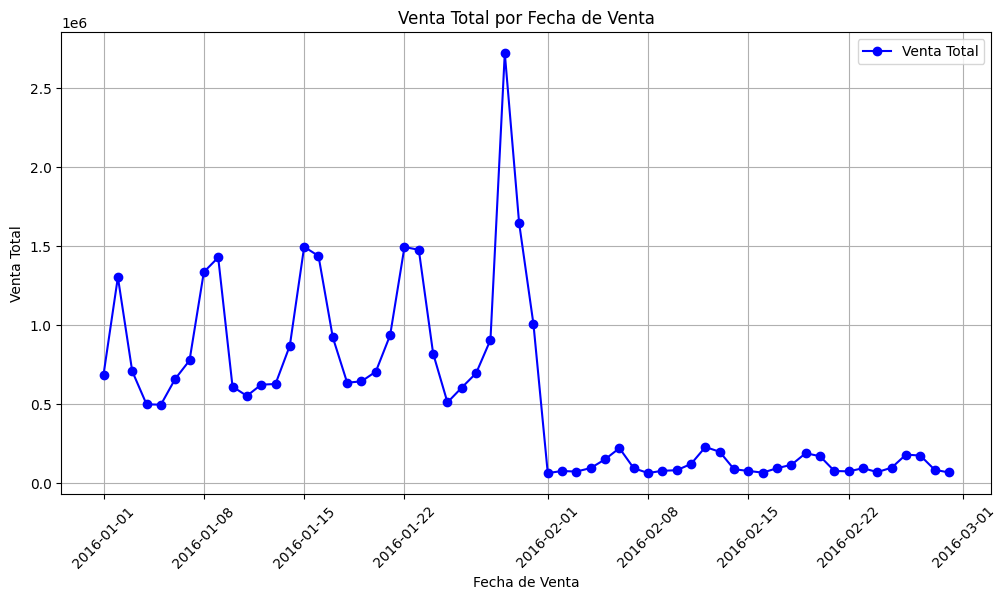

In [13]:
# Asegurarse de que la columna "Fecha_Venta" esté en formato datetime
VentasFinal['SalesDate'] = pd.to_datetime(VentasFinal['SalesDate'])

# Redondear la columna "Venta_Total" a 2 decimales
VentasFinal['SalesDollars'] = VentasFinal['SalesDollars'].round(2)

# Agrupar los datos por fecha y sumar los valores de "Venta_Total"
ventas_agrupadas = VentasFinal.groupby('SalesDate').agg({'SalesDollars': 'sum'}).reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))

# Plot de la venta total
plt.plot(ventas_agrupadas['SalesDate'], ventas_agrupadas['SalesDollars'], marker='o', linestyle='-', color='b', label='Venta Total')

# Añadir títulos y etiquetas
plt.title('Venta Total por Fecha de Venta')
plt.xlabel('Fecha de Venta')
plt.ylabel('Venta Total')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Grafico de barras de cantidad de ventas por proveedor, donde solo se mostraran los mejores vendedores con mas de 10'000 de ventas.



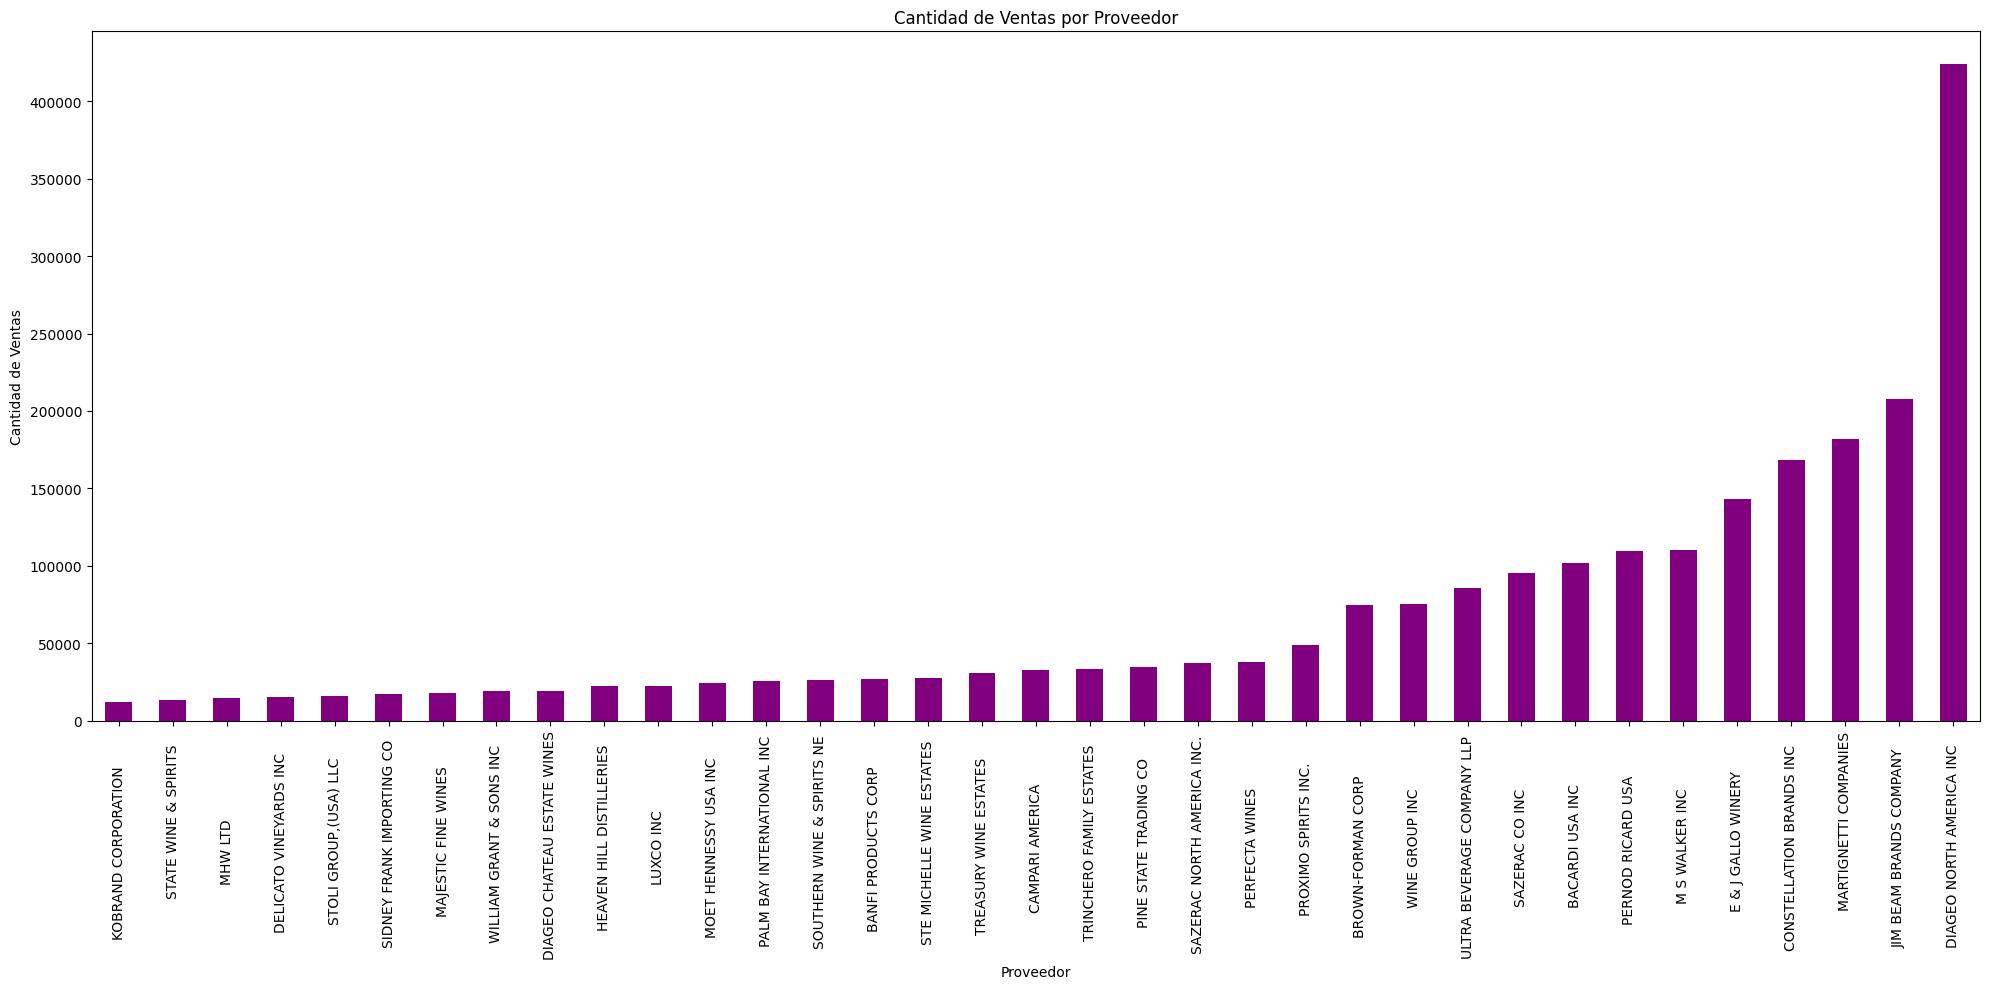

In [14]:
# Agrupar por proveedor y sumar las cantidades de ventas
cantidad_por_proveedor = VentasFinal.groupby('VendorName')['SalesQuantity'].sum().sort_values()

# Filtrar los proveedores que tienen ventas
cantidad_por_proveedor = cantidad_por_proveedor[cantidad_por_proveedor> 10000]

# Crear el gráfico de barras
plt.figure(figsize=(20, 10))
cantidad_por_proveedor.plot(kind='bar', color='purple')
plt.title('Cantidad de Ventas por Proveedor')
plt.xlabel('Proveedor')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()